## Observations and Insights 

From the data, three observations or inferences may be:
1. As weight of mouse increases, there is an increase in tumor volume for mice treated with Capomulin
2. Combining all drug regimens, the number of female and male mice experimented on, were almost equal
3. The final tumor volumes  of mice treated with drugs Capomulin and Ramicane were less than those treated with Infubinol and Ceftamin

In [125]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data = pd.merge(mouse_metadata, study_results, on=["Mouse ID"])
# Display the data table for preview
data.head(15)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [126]:
# Checking the number of mice.
number_of_mice=len(data["Mouse ID"].value_counts())
print(f"The number of mice are {number_of_mice}")

The number of mice are 249


In [127]:
print(f"Total number of data in our original data frame are: {len(data['Mouse ID'])}")

Total number of data in our original data frame are: 1893


In [128]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#Making a new column to mark all duplicate data (excpet the first occurrence) as 
#"True" in a new column called "Duplicate"
data["Duplicate"]=data.duplicated(subset=['Mouse ID','Timepoint'],keep='first')

#Preview of dataframe with the "Duplicate" column added. 
#For entries that dont have duplicates, the value is set as "False"
data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicate
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False


In [129]:
# Optional: Get all the data for the duplicate mouse ID. 

#Accessing all the duplicates by checking the value of "Duplicate" column
duplicate_mice = data[ data['Duplicate'] == True ]
print(f"Duplicate data exists for these Mouse ID: ")

dup_ID=duplicate_mice["Mouse ID"].value_counts()
print(dup_ID.index)

#Printing the details about the duplicate data entries
print("Here are the duplicate details: ")
duplicate_mice


Duplicate data exists for these Mouse ID: 
Index(['g989'], dtype='object')
Here are the duplicate details: 


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicate
909,g989,Propriva,Female,21,26,0,45.000000,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
913,g989,Propriva,Female,21,26,10,49.880528,0,True
915,g989,Propriva,Female,21,26,15,53.442020,0,True
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [130]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

#Getting the indices of the duplicate rows
dup_names = data[ data['Duplicate'] == True ].index
#Dropping the duplicate rows
data=data.drop(dup_names)

print(f"Total number of data in our clean data frame are: {len(data['Mouse ID'])}")


Total number of data in our clean data frame are: 1888


In [131]:
#Dropping the Duplicate column as we no longer need it
data=data.drop(columns=["Duplicate"])

In [132]:
#Preview of clean data frame
data.head(15)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


## Summary Statistics

In [133]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
regimen_data=data.groupby("Drug Regimen",as_index=True)
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
regimen_mean=regimen_data["Tumor Volume (mm3)"].mean()
regimen_median=regimen_data["Tumor Volume (mm3)"].median()
regimen_std=regimen_data["Tumor Volume (mm3)"].std()
regimen_sem=regimen_data["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary dataframe.
summary_stats=pd.DataFrame({"Mean":regimen_mean,
                            "Median":regimen_median,
                            "Standard Deviation":regimen_std,
                            "Standard Error of Means":regimen_sem
    
})
summary_stats

,Mean,Median,Standard Deviation,Standard Error of Means
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.393463,50.909965,6.568014,0.525862
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


In [134]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
regimen_data_2=regimen_data.agg({'Tumor Volume (mm3)' : ['mean', 'median','std','sem']})
regimen_data_2

Tumor Volume (mm3)                               
                           mean     median       std       sem
Drug Regimen                                                  
Capomulin             40.675741  41.557809  4.994774  0.329346
Ceftamin              52.591172  51.776157  6.268188  0.469821
Infubinol             52.884795  51.820584  6.567243  0.492236
Ketapril              55.235638  53.698743  8.279709  0.603860
Naftisol              54.331565  52.509285  8.134708  0.596466
Placebo               54.033581  52.288934  7.821003  0.581331
Propriva              52.393463  50.909965  6.568014  0.525862
Ramicane              40.216745  40.673236  4.846308  0.320955
Stelasyn              54.233149  52.431737  7.710419  0.573111
Zoniferol             53.236507  51.818479  6.966589  0.516398

## Bar and Pie Charts

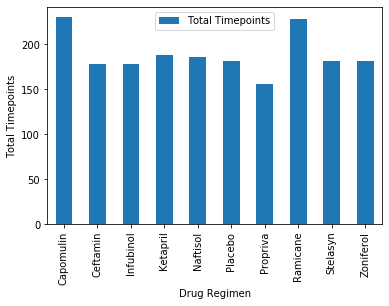

In [135]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
total_timepoints=regimen_data["Timepoint"].count()
timepoint_df=pd.DataFrame({"Total Timepoints": total_timepoints
    
})

timepoint_df.plot(kind="bar")
plt.ylabel("Total Timepoints")
plt.show()

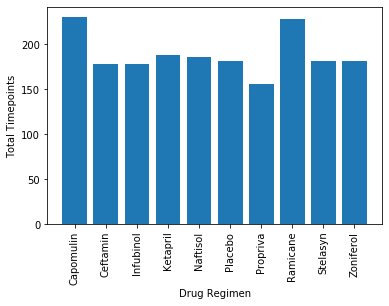

In [136]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x=timepoint_df.index
y=timepoint_df["Total Timepoints"]
plt.bar(x,y)
plt.ylabel("Total Timepoints")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.show()

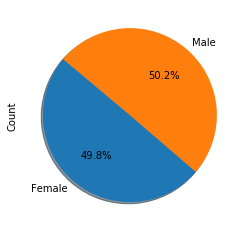

In [137]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_data=data[["Mouse ID","Sex"]]
gender_data=gender_data.drop_duplicates(subset=['Mouse ID'],keep='first')
gender_data=gender_data.groupby("Sex")
gender=gender_data["Mouse ID"].count()

gender_df=pd.DataFrame({"Count":gender
    
})

gender_df["Count"].plot(kind="pie", autopct='%1.1f%%',shadow=True, startangle=140)
plt.show()

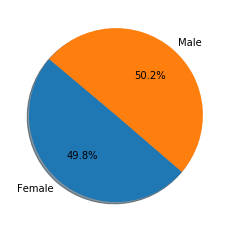

In [138]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["blue", "orange"]
labels=gender_df.index

plt.pie(gender_df["Count"], labels=labels, 
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

## Quartiles, Outliers and Boxplots

In [139]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_time=data.groupby("Mouse ID")

last_time=last_time["Timepoint"].max()
last_time_df=pd.DataFrame({"Timepoint":last_time
    
})
#Dataframe containing the unique mouse IDs and the highest timepoint
last_time_df


,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30
...,...
z435,10
z578,45
z581,45


In [140]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

#Merging the data so that we only have data for the tumor volumes at the highest timepoints
tumor_vol_df=data.merge(last_time,how='inner',on=["Mouse ID","Timepoint"])
tumor_vol_df=tumor_vol_df.reset_index(drop=True)


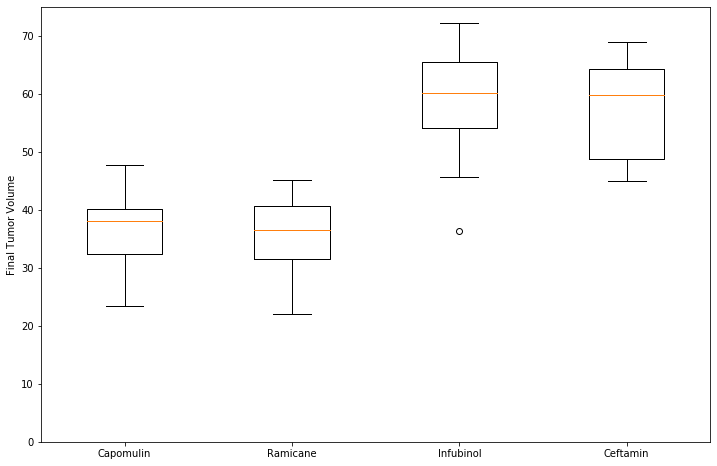

In [141]:
# Put treatments into a list for for loop (and later for plot labels)

treatments=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=list()

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

fig, ax = plt.subplots(figsize=(12,8))

for treatment in treatments:   
    # Locate the rows which contain mice on each drug and get the tumor volumes
    x=tumor_vol_df.loc[tumor_vol_df["Drug Regimen"]==treatment,"Tumor Volume (mm3)"]
    tumor_vol.append(x)
    
ax.boxplot(tumor_vol)
    
ax.set_ylabel('Final Tumor Volume')
ax.set_xticklabels(treatments,rotation=0, rotation_mode="anchor")
ax.set_ylim([0,75])
plt.show()

In [142]:
treatments=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
#treatments=["Capomulin"]
# Create empty list to fill with tumor vol data (for plotting)

outliers=list()
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for treatment in treatments:   
    outliers=list()
    # Locate the rows which contain mice on each drug and get the tumor volumes
    x=tumor_vol_df.loc[tumor_vol_df["Drug Regimen"]==treatment,"Tumor Volume (mm3)"]
    quartiles = x.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr) 
    
    for y  in x:
        if((y>upper_bound)|(y<lower_bound)):
            outliers.append(round(y,2))
    print(f"For Treatment {treatment}:")
    print(f"Inter quartile range is between {round(lowerq,2)} and {round(upperq,2)}")
    print(f"The lower bound is {round(lower_bound,2)} and upper bound is {round(upper_bound,2)}")
    print(f"The outliers are {outliers}")
    print("------------------------------------------------------------------------------------------------- ")


For Treatment Capomulin:
Inter quartile range is between 32.38 and 40.16
The lower bound is 20.7 and upper bound is 51.83
The outliers are []
------------------------------------------------------------------------------------------------- 
For Treatment Ramicane:
Inter quartile range is between 31.56 and 40.66
The lower bound is 17.91 and upper bound is 54.31
The outliers are []
------------------------------------------------------------------------------------------------- 
For Treatment Infubinol:
Inter quartile range is between 54.05 and 65.53
The lower bound is 36.83 and upper bound is 82.74
The outliers are [36.32]
------------------------------------------------------------------------------------------------- 
For Treatment Ceftamin:
Inter quartile range is between 48.72 and 64.3
The lower bound is 25.36 and upper bound is 87.67
The outliers are []
------------------------------------------------------------------------------------------------- 


## Line and Scatter Plots

Here are the Mouse ID choices for Capomulin
Index(['b128', 'i557', 'i738', 'm601', 'l509', 'b742', 's710', 'y793', 'm957',
       'x401', 'r944', 't565', 'v923', 'g288', 'r554', 'w914', 's185', 'l897',
       'g316', 'j119', 'u364', 'j246', 'f966', 'r157', 'w150'],
      dtype='object')
------------------------------------------
Here is the profile for Mouse s185 (default)


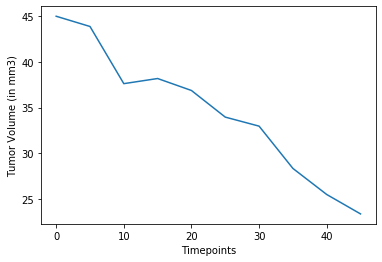

In [143]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#Extracting data for only Capomulin
cap_df=data[data["Drug Regimen"]=="Capomulin"]
print(f"Here are the Mouse ID choices for Capomulin")

choices=cap_df["Mouse ID"].value_counts()
print(choices.index)
print("------------------------------------------")


print("Here is the profile for Mouse s185 (default)")
mouse='s185'
xd=cap_df.loc[cap_df["Mouse ID"]==mouse,"Timepoint"]
yd=cap_df.loc[cap_df["Mouse ID"]==mouse,"Tumor Volume (mm3)"]
plt.plot(xd,yd)
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume (in mm3)")
plt.show()


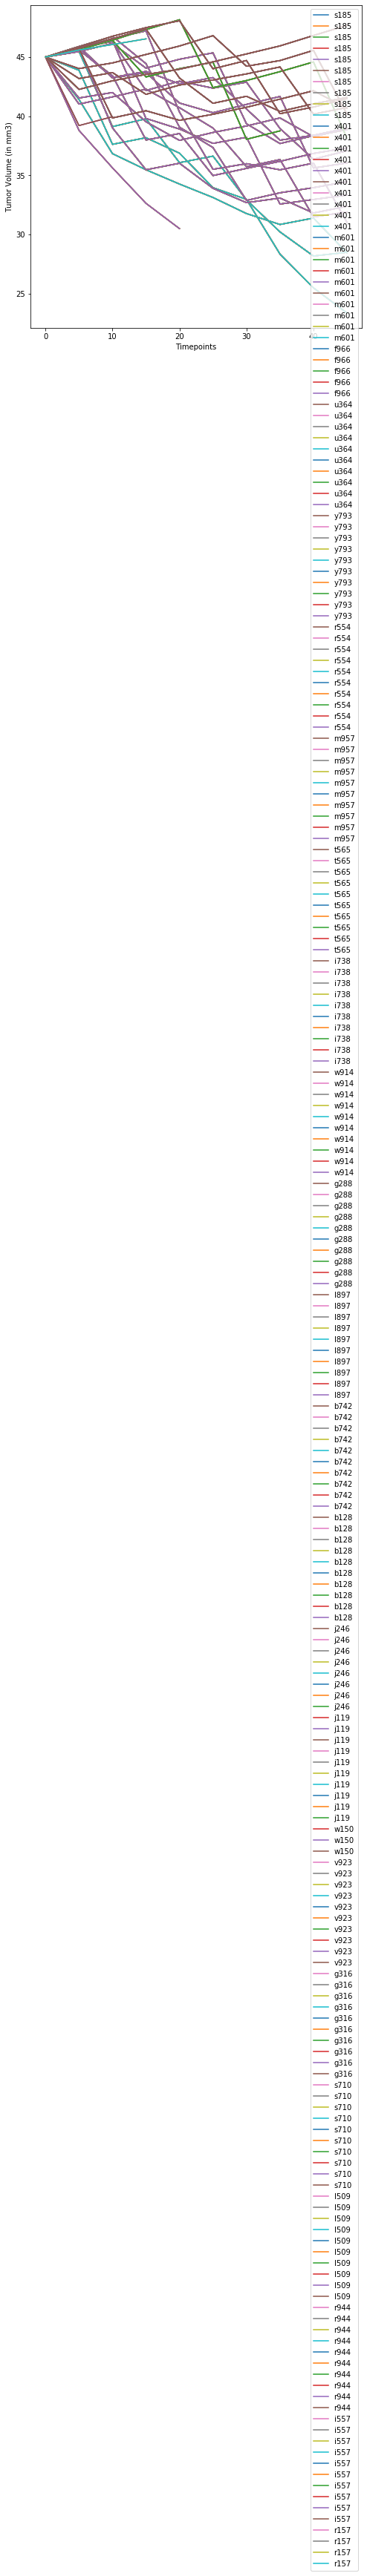

In [144]:
#For all mouse IDs
from matplotlib.pyplot import figure
figure(figsize=(8, 8))

for mouse_id in cap_df["Mouse ID"]:
    
    x=cap_df.loc[cap_df["Mouse ID"]==mouse_id,"Timepoint"]
    y=cap_df.loc[cap_df["Mouse ID"]==mouse_id,"Tumor Volume (mm3)"]
    plt.plot(x,y,label=mouse_id)
    plt.xlabel("Timepoints")
    plt.ylabel("Tumor Volume (in mm3)")
    
plt.legend(loc='upper right')
plt.show()

## Correlation and Regression

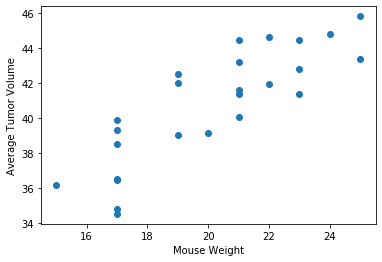

In [145]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#Building new dataframe by grouping by "Mouse ID"
cap_df_group=cap_df.groupby(["Mouse ID"])

#Making scatter plot of Average Tumor Volume vs Mouse Weight
plt.scatter(cap_df_group["Weight (g)"].mean(),cap_df_group["Tumor Volume (mm3)"].mean())
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.show()



In [146]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#Finding the correlation coefficient
x_axis=cap_df_group["Weight (g)"].mean()
y_axis=cap_df_group["Tumor Volume (mm3)"].mean()
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation coefficient is {round(correlation[0],2)}")


The correlation coefficient is 0.84


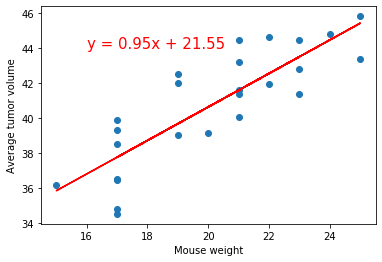

In [147]:
#Importing linregress
from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values=[]

#Finding the linear regression predicted average tumor volume
for x_value in x_axis:
    regress_values.append(x_value*slope+intercept)
    
#Building the line equation for annotation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Making the scatter plot
plt.scatter(x_axis,y_axis)

#Making the line plot for the linear regression equation
plt.plot(x_axis,regress_values,"r-")

#Providing the annotation of the line equation
plt.annotate(line_eq,(16,44),fontsize=15,color="red")
plt.xlabel('Mouse weight')
plt.ylabel('Average tumor volume')
plt.show()